In [655]:
import pandas as pd
import numpy as np
pd.set_option('max_columns',None)
from datetime import date
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [656]:
train = pd.read_csv(r'C:\Users\ezchave\Desktop\Work\Amex\train.csv')
campaign_data = pd.read_csv(r'C:\Users\ezchave\Desktop\Work\Amex\campaign_data.csv')
coupon_item_mapping = pd.read_csv(r'C:\Users\ezchave\Desktop\Work\Amex\coupon_item_mapping.csv')
customer_demographics = pd.read_csv(r'C:\Users\ezchave\Desktop\Work\Amex\customer_demographics.csv')
customer_transaction_data = pd.read_csv(r'C:\Users\ezchave\Desktop\Work\Amex\customer_transaction_data.csv')
item_data = pd.read_csv(r'C:\Users\ezchave\Desktop\Work\Amex\item_data.csv')
sample_submission = pd.read_csv(r'C:\Users\ezchave\Desktop\Work\Amex\sample_submission_Byiv0dS.csv')
test = pd.read_csv(r'C:\Users\ezchave\Desktop\Work\Amex\test_QyjYwdj.csv')


In [657]:
test = pd.read_csv(r'C:\Users\ezchave\Desktop\Work\Amex\test_QyjYwdj.csv')

### explore campaign_data

In [658]:
campaign_data.head()

,campaign_id,campaign_type,start_date,end_date
0,24,Y,21/10/13,20/12/13
1,25,Y,21/10/13,22/11/13
2,20,Y,07/09/13,16/11/13
3,23,Y,08/10/13,15/11/13
4,21,Y,16/09/13,18/10/13


In [659]:
campaign_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 4 columns):
campaign_id      28 non-null int64
campaign_type    28 non-null object
start_date       28 non-null object
end_date         28 non-null object
dtypes: int64(1), object(3)
memory usage: 976.0+ bytes


In [660]:
campaign_data.campaign_type.unique()

array(['Y', 'X'], dtype=object)

In [661]:
# number of campaigns
campaign_data.campaign_id.unique().shape

(28,)

In [662]:
campaign_data.start_date = pd.to_datetime(campaign_data.start_date,dayfirst=True)
campaign_data.end_date = pd.to_datetime(campaign_data.end_date,dayfirst=True)

In [663]:
campaign_data['campaign_length'] = campaign_data.end_date - campaign_data.start_date

In [664]:
campaign_data

,campaign_id,campaign_type,start_date,end_date,campaign_length
0,24,Y,2013-10-21,2013-12-20,60 days
1,25,Y,2013-10-21,2013-11-22,32 days
2,20,Y,2013-09-07,2013-11-16,70 days
3,23,Y,2013-10-08,2013-11-15,38 days
4,21,Y,2013-09-16,2013-10-18,32 days
5,22,X,2013-09-16,2013-10-18,32 days
6,18,X,2013-08-10,2013-10-04,55 days
7,19,Y,2013-08-26,2013-09-27,32 days
8,17,Y,2013-07-29,2013-08-30,32 days
9,16,Y,2013-07-15,2013-08-16,32 days


In [665]:
campaign_data.campaign_length = campaign_data.campaign_length.dt.days

In [666]:
campaign_data.loc[campaign_data.campaign_length < 0,'start_date'],campaign_data.loc[campaign_data.campaign_length < 0,'end_date'] = campaign_data.loc[campaign_data.campaign_length < 0,'end_date'] ,campaign_data.loc[campaign_data.campaign_length < 0,'start_date']

In [667]:
campaign_data.sort_values('campaign_id',inplace=True)
campaign_data.reset_index(inplace=True,drop = True)

In [668]:
campaign_data.campaign_length = campaign_data.campaign_length.abs()

In [669]:
campaign_data

,campaign_id,campaign_type,start_date,end_date,campaign_length
0,1,Y,2012-12-12,2013-01-18,37
1,2,Y,2012-12-17,2013-01-18,32
2,3,Y,2012-12-22,2013-02-16,56
3,4,Y,2013-01-07,2013-02-08,32
4,5,Y,2013-01-12,2013-02-15,34
5,6,Y,2013-01-28,2013-03-01,32
6,7,Y,2013-02-02,2013-03-08,34
7,8,X,2013-02-16,2013-04-05,48
8,9,Y,2013-03-11,2013-04-12,32
9,10,Y,2013-04-08,2013-05-10,32


In [670]:
campaign_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
campaign_id        28 non-null int64
campaign_type      28 non-null object
start_date         28 non-null datetime64[ns]
end_date           28 non-null datetime64[ns]
campaign_length    28 non-null int64
dtypes: datetime64[ns](2), int64(2), object(1)
memory usage: 1.2+ KB


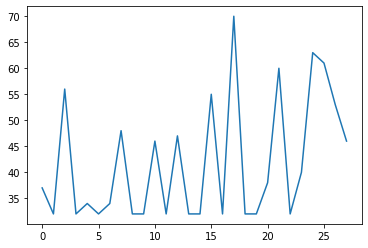

In [671]:
plt.plot(campaign_data.campaign_length)

{'bodies': [<matplotlib.collections.PolyCollection at 0x1cb1e856710>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1cb1e856630>,
 'cmins': <matplotlib.collections.LineCollection at 0x1cb1e856978>,
 'cbars': <matplotlib.collections.LineCollection at 0x1cb1e8567f0>}

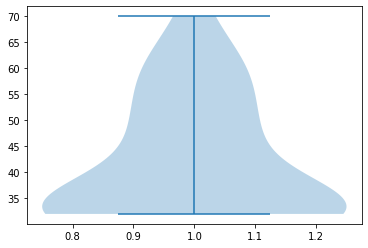

In [672]:
# most of the campaigns had less than 120 days length !
plt.violinplot(campaign_data.campaign_length)

### explore coupon_item_mapping

In [673]:
coupon_item_mapping.head()

,coupon_id,item_id
0,105,37
1,107,75
2,494,76
3,522,77
4,518,77


In [674]:
coupon_item_mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92663 entries, 0 to 92662
Data columns (total 2 columns):
coupon_id    92663 non-null int64
item_id      92663 non-null int64
dtypes: int64(2)
memory usage: 1.4 MB


In [675]:
# number of type of coupons around
coupon_item_mapping.coupon_id.unique().shape

(1116,)

 ### explore customer_demographics

In [676]:
customer_demographics.head(10)

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
4,10,46-55,Single,0,1,NaN,5
5,11,70+,Single,0,2,NaN,1
6,12,46-55,Married,0,2,NaN,7
7,13,36-45,Single,0,1,NaN,2
8,14,26-35,Married,1,2,NaN,6
9,15,46-55,Married,0,2,NaN,6


In [677]:
customer_demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 7 columns):
customer_id       760 non-null int64
age_range         760 non-null object
marital_status    431 non-null object
rented            760 non-null int64
family_size       760 non-null object
no_of_children    222 non-null object
income_bracket    760 non-null int64
dtypes: int64(3), object(4)
memory usage: 41.6+ KB


In [751]:
train[~train.customer_id.isin(customer_demographics.customer_id)]

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_length_x,no_of_items_in_coupon,recency,avg_coupon_discount,ttl_quantity,campaign_type_X,age_range,marital_status,rented,family_size,no_of_children,income_bracket,campaign_length_y,campaign_type
4,2075,13,27,351,0,47,125,83,-0.248629,15955,1,NaN,NaN,NaN,NaN,NaN,NaN,47,X
5,2496,13,27,1531,0,47,125,64,0.000000,1105,1,NaN,NaN,NaN,NaN,NaN,NaN,47,X
6,3062,13,27,810,0,47,125,64,0.000000,13706,1,NaN,NaN,NaN,NaN,NaN,NaN,47,X
7,3801,13,27,1507,0,47,125,65,-0.440974,61093,1,NaN,NaN,NaN,NaN,NaN,NaN,47,X
9,7266,13,27,111,0,47,125,65,0.000000,637,1,NaN,NaN,NaN,NaN,NaN,NaN,47,X
10,8235,13,27,344,0,47,125,73,-0.248842,4171,1,NaN,NaN,NaN,NaN,NaN,NaN,47,X
11,9444,13,27,632,0,47,125,62,-3.208023,450128,1,NaN,NaN,NaN,NaN,NaN,NaN,47,X
14,13730,13,27,1200,0,47,125,64,0.000000,112572,1,NaN,NaN,NaN,NaN,NaN,NaN,47,X
15,13862,13,27,1282,0,47,125,72,0.000000,489,1,NaN,NaN,NaN,NaN,NaN,NaN,47,X
16,14982,13,27,20,0,47,125,63,0.000000,32574,1,NaN,NaN,NaN,NaN,NaN,NaN,47,X


In [679]:
customer_demographics.fillna(0,inplace=True)

In [680]:
# number of customers
customer_demographics.customer_id.unique().shape

(760,)

In [681]:
# customer age ranges
customer_demographics.age_range.unique()

array(['70+', '46-55', '26-35', '36-45', '18-25', '56-70'], dtype=object)

In [682]:
customer_demographics.age_range.replace('18-25',0,inplace = True)
customer_demographics.age_range.replace('26-35',1,inplace = True)
customer_demographics.age_range.replace('36-45',2,inplace = True)
customer_demographics.age_range.replace('46-55',3,inplace = True)
customer_demographics.age_range.replace('56-70',4,inplace = True)
customer_demographics.age_range.replace('70+',5,inplace = True)

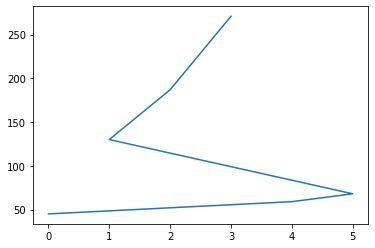

In [683]:
plt.plot(customer_demographics.age_range.value_counts())

In [684]:
customer_demographics.marital_status.value_counts()

0          329
Married    317
Single     114
Name: marital_status, dtype: int64

In [685]:
customer_demographics['marital_status'] = customer_demographics.marital_status.map(lambda x : 1 if x == 'Married' else 2 if x =='Single' else 3)

In [686]:
customer_demographics.rented.value_counts()

0    719
1     41
Name: rented, dtype: int64

In [687]:
customer_demographics.family_size.replace('5+','5',inplace=True)

In [688]:
customer_demographics.family_size.value_counts()

2    303
1    248
3    104
5     57
4     48
Name: family_size, dtype: int64

In [689]:
customer_demographics.no_of_children.value_counts()

0     538
1     107
3+     60
2      55
Name: no_of_children, dtype: int64

In [690]:
customer_demographics.no_of_children.replace('3+',3,inplace = True)

In [691]:
customer_demographics.income_bracket.value_counts()

5     187
4     165
6      88
3      70
2      68
1      59
8      37
7      32
9      29
12     10
10     10
11      5
Name: income_bracket, dtype: int64

In [692]:
customer_demographics.family_size = customer_demographics.family_size.astype(int)
customer_demographics.no_of_children = customer_demographics.no_of_children.astype(int)

### explore customer_transaction_data

In [693]:
customer_transaction_data.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0


In [694]:
customer_transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324566 entries, 0 to 1324565
Data columns (total 7 columns):
date               1324566 non-null object
customer_id        1324566 non-null int64
item_id            1324566 non-null int64
quantity           1324566 non-null int64
selling_price      1324566 non-null float64
other_discount     1324566 non-null float64
coupon_discount    1324566 non-null float64
dtypes: float64(3), int64(3), object(1)
memory usage: 70.7+ MB


In [695]:
customer_transaction_data.date = pd.to_datetime(customer_transaction_data.date)

In [696]:
customer_transaction_data.date.unique()

array(['2012-01-02T00:00:00.000000000', '2012-01-03T00:00:00.000000000',
       '2012-01-04T00:00:00.000000000', '2012-01-05T00:00:00.000000000',
       '2012-01-06T00:00:00.000000000', '2012-01-07T00:00:00.000000000',
       '2012-01-08T00:00:00.000000000', '2012-01-09T00:00:00.000000000',
       '2012-01-10T00:00:00.000000000', '2012-01-11T00:00:00.000000000',
       '2012-01-12T00:00:00.000000000', '2012-01-13T00:00:00.000000000',
       '2012-01-14T00:00:00.000000000', '2012-01-15T00:00:00.000000000',
       '2012-01-16T00:00:00.000000000', '2012-01-17T00:00:00.000000000',
       '2012-01-18T00:00:00.000000000', '2012-01-19T00:00:00.000000000',
       '2012-01-20T00:00:00.000000000', '2012-01-21T00:00:00.000000000',
       '2012-01-22T00:00:00.000000000', '2012-01-23T00:00:00.000000000',
       '2012-01-24T00:00:00.000000000', '2012-01-25T00:00:00.000000000',
       '2012-01-26T00:00:00.000000000', '2012-01-27T00:00:00.000000000',
       '2012-01-28T00:00:00.000000000', '2012-01-29

In [697]:
customer_transaction_data.customer_id.unique().shape

(1582,)

In [698]:
customer_transaction_data.coupon_discount.sum()

-787982.0900000004

In [699]:
customer_transaction_data['total_discount'] = customer_transaction_data.other_discount + customer_transaction_data.coupon_discount

In [700]:
customer_transaction_data.total_discount.sum()

-24323806.740000006

In [701]:
customer_transaction_data = pd.merge(customer_transaction_data,customer_transaction_data[['customer_id','total_discount']].groupby('customer_id').sum().reset_index(),on='customer_id',how = 'left')

In [702]:
customer_transaction_data.rename(columns = {'total_discount_x':'total_discount_transaction','total_discount_y':'total_discount_customer'},inplace=True)

In [759]:
customer_transaction_data[customer_transaction_data.item_id == 26830]

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,total_discount_transaction,total_discount_customer,recency,day,dotw
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0,-10.69,-7289.57,610,2,Monday
80,2012-01-02,135,26830,1,35.26,-10.69,0.0,-10.69,-10704.39,610,2,Monday
128,2012-01-02,464,26830,1,35.26,-10.69,0.0,-10.69,-81477.05,610,2,Monday
2548,2012-01-12,1185,26830,1,45.95,0.00,0.0,0.00,-5290.64,600,12,Thursday
2779,2012-01-13,1140,26830,1,45.95,0.00,0.0,0.00,-16854.23,599,13,Friday
3048,2012-01-13,1383,26830,1,45.95,0.00,0.0,0.00,-26304.96,599,13,Friday
7132,2012-01-22,1396,26830,1,53.07,0.00,0.0,0.00,-14945.96,590,22,Sunday
10410,2012-01-28,1223,26830,1,53.07,0.00,0.0,0.00,-5327.69,584,28,Saturday
10816,2012-01-29,329,26830,1,53.07,0.00,0.0,0.00,-56097.94,583,29,Sunday
12657,2012-02-01,436,26830,1,53.07,0.00,0.0,0.00,-23033.70,580,1,Wednesday


In [752]:
customer_transaction_data['day'] = customer_transaction_data.date.dt.day

In [758]:
customer_transaction_data['dotw'] = customer_transaction_data.date.dt.strftime('%A')

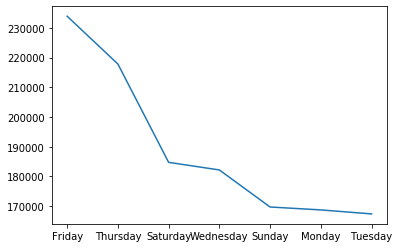

In [792]:
plt.plot(customer_transaction_data.dotw.value_counts())

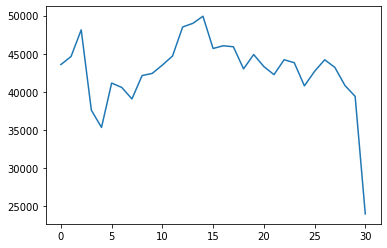

In [790]:
## shopping trends according to the day of the manth
plt.plot(pd.DataFrame(customer_transaction_data.day.value_counts()).reset_index().sort_values('index').reset_index(drop=True)['day'])

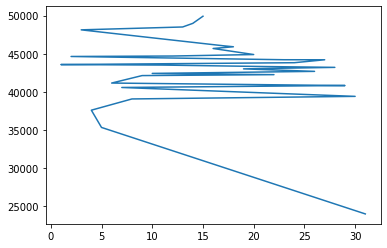

In [777]:
plt.plot(customer_transaction_data.day.value_counts())

In [771]:
customer_transaction_data = pd.merge(customer_transaction_data,customer_transaction_data[['item_id','total_discount_transaction']].groupby('item_id').sum().reset_index(),on='item_id',how='inner')

In [793]:
customer_transaction_data.rename(columns= {'total_discount_transaction_x':'total_discount_transaction','total_discount_transaction_y':'item_ttl_discnt'},inplace=True)
customer_transaction_data.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,total_discount_transaction,total_discount_customer,recency,day,dotw,item_ttl_discnt
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0,-10.69,-7289.57,610,2,Monday,-224.45
1,2012-01-02,135,26830,1,35.26,-10.69,0.0,-10.69,-10704.39,610,2,Monday,-224.45
2,2012-01-02,464,26830,1,35.26,-10.69,0.0,-10.69,-81477.05,610,2,Monday,-224.45
3,2012-01-12,1185,26830,1,45.95,0.00,0.0,0.00,-5290.64,600,12,Thursday,-224.45
4,2012-01-13,1140,26830,1,45.95,0.00,0.0,0.00,-16854.23,599,13,Friday,-224.45


In [804]:
customer_transaction_data[customer_transaction_data.item_id == 300]

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,total_discount_transaction,total_discount_customer,recency,day,dotw,item_ttl_discnt
1147075,2012-05-11,1225,300,1,35.62,0.00,0.0,0.00,-6763.46,480,11,Friday,-7.12
1147076,2012-05-29,1225,300,1,35.62,0.00,0.0,0.00,-6763.46,462,29,Tuesday,-7.12
1147077,2012-06-09,1225,300,1,28.50,-7.12,0.0,-7.12,-6763.46,451,9,Saturday,-7.12
1147078,2013-06-11,999,300,1,35.62,0.00,0.0,0.00,-14022.08,84,11,Tuesday,-7.12


In [811]:
customer_transaction_data['item_best_dotw'] = customer_transaction_data.groupby('item_id').dotw.transform(lambda x : (x).value_counts().idxmax())

In [817]:
customer_transaction_data['most_purchased_item'] = customer_transaction_data[['customer_id','item_id']].groupby('customer_id').item_id.transform(lambda x : (x).value_counts().idxmax())

In [819]:
customer_transaction_data['customer_best_dotw'] = customer_transaction_data.groupby('customer_id').dotw.transform(lambda x : (x).value_counts().idxmax())

In [820]:
customer_transaction_data.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,total_discount_transaction,total_discount_customer,recency,day,dotw,item_ttl_discnt,item_best_day,item_best_dotw,most_purchased_item,customer_best_dotw
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0,-10.69,-7289.57,610,2,Monday,-224.45,Wednesday,Thursday,26854,Thursday
1,2012-01-02,135,26830,1,35.26,-10.69,0.0,-10.69,-10704.39,610,2,Monday,-224.45,Wednesday,Thursday,48922,Thursday
2,2012-01-02,464,26830,1,35.26,-10.69,0.0,-10.69,-81477.05,610,2,Monday,-224.45,Wednesday,Thursday,49009,Monday
3,2012-01-12,1185,26830,1,45.95,0.00,0.0,0.00,-5290.64,600,12,Thursday,-224.45,Wednesday,Thursday,34047,Friday
4,2012-01-13,1140,26830,1,45.95,0.00,0.0,0.00,-16854.23,599,13,Friday,-224.45,Wednesday,Thursday,25759,Friday


### explore item_data

In [704]:
item_data.head()

,item_id,brand,brand_type,category
0,1,1,Established,Grocery
1,2,1,Established,Miscellaneous
2,3,56,Local,Bakery
3,4,56,Local,Grocery
4,5,56,Local,Grocery


In [705]:
item_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74066 entries, 0 to 74065
Data columns (total 4 columns):
item_id       74066 non-null int64
brand         74066 non-null int64
brand_type    74066 non-null object
category      74066 non-null object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [706]:
item_data.brand_type.value_counts()

Established    62842
Local          11224
Name: brand_type, dtype: int64

In [707]:
item_data.category.value_counts()

Grocery                   32448
Pharmaceutical            24471
Natural Products           2533
Dairy, Juices & Snacks     2425
Skin & Hair Care           2244
Meat                       2080
Packaged Meat              1966
Prepared Food              1880
Bakery                     1679
Seafood                     728
Flowers & Plants            664
Miscellaneous               385
Alcohol                     303
Garden                      102
Restauarant                  78
Salads                       40
Travel                       19
Fuel                         14
Vegetables (cut)              7
Name: category, dtype: int64

In [813]:
item_data = pd.merge(item_data,customer_transaction_data[['item_id','item_ttl_discnt','item_best_dotw']],on='item_id',how='left')

In [814]:
item_data.head()

,item_id,brand,brand_type,category,item_ttl_discnt,item_best_dotw
0,1,1,Established,Grocery,0.0,Tuesday
1,1,1,Established,Grocery,0.0,Tuesday
2,2,1,Established,Miscellaneous,0.0,Friday
3,3,56,Local,Bakery,0.0,Wednesday
4,4,56,Local,Grocery,0.0,Sunday


In [708]:
sample_submission.head()

,id,redemption_status
0,3,0
1,4,0
2,5,0
3,8,0
4,10,0


In [709]:
train.head()

,id,campaign_id,coupon_id,customer_id,redemption_status
0,1,13,27,1053,0
1,2,13,116,48,0
2,6,9,635,205,0
3,7,13,644,1050,0
4,9,8,1017,1489,0


In [710]:
test.head()

,id,campaign_id,coupon_id,customer_id
0,3,22,869,967
1,4,20,389,1566
2,5,22,981,510
3,8,25,1069,361
4,10,17,498,811


In [711]:
sorted(test.campaign_id.unique())

[16, 17, 18, 19, 20, 21, 22, 23, 24, 25]

In [712]:
sorted(train.campaign_id.unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 26, 27, 28, 29, 30]

### making the feature dataframe now 

In [713]:
# taking campaign data into account 
print(train.shape)
train = pd.merge(train,campaign_data[['campaign_id','campaign_length','campaign_type']],on = 'campaign_id',how = 'inner')
print(train.shape)

(78369, 5)
(78369, 7)


In [714]:
# taking coupon data into account
train = pd.merge(train,pd.DataFrame(coupon_item_mapping['coupon_id'].value_counts()).reset_index().rename(columns = {'index':'coupon_id','coupon_id':'no_of_items_in_coupon'}),on = 'coupon_id',how='inner')
print(train.shape)

(78369, 8)


In [715]:
print(train.shape)

(78369, 8)


In [716]:
# taking customer's transaction data into account now
customer_transaction_data.head()
customer_transaction_data['recency'] =  pd.to_datetime('2013-09-03') - pd.to_datetime(customer_transaction_data['date'])
customer_transaction_data.recency = customer_transaction_data.recency.dt.days

In [717]:
train = pd.merge(train,customer_transaction_data[['customer_id','recency']].groupby('customer_id').min().reset_index(),on='customer_id',how = 'left')

In [718]:
train = pd.merge(train,customer_transaction_data[['customer_id','coupon_discount']].groupby('customer_id').mean().reset_index(),how='left',on='customer_id')
train.rename(columns = {'coupon_discount':'avg_coupon_discount'},inplace=True)

In [719]:
train = pd.merge(train,customer_transaction_data[['customer_id','quantity']].groupby('customer_id').sum().reset_index(),how='left',on='customer_id').rename(columns = {'quantity':'ttl_quantity'})


In [720]:
train['campaign_type_X'] = train['campaign_type'].map(lambda x :1 if x == 'X' else 0)
train.drop('campaign_type',axis=1,inplace=True)

In [721]:
train = pd.merge(train,customer_demographics,how='left',on='customer_id')

In [821]:
train.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_length_x,no_of_items_in_coupon,recency,avg_coupon_discount,ttl_quantity,campaign_type_X,age_range,marital_status,rented,family_size,no_of_children,income_bracket,campaign_length_y,campaign_type
0,1,13,27,1053,0,47,125,64,-0.287258,105551,1,3.0,3.0,0.0,1.0,0.0,5.0,47,X
1,370,13,27,1168,0,47,125,62,-1.447444,36727,1,0.0,1.0,1.0,2.0,0.0,4.0,47,X
2,554,13,27,1061,0,47,125,62,-0.976282,1960,1,2.0,2.0,0.0,1.0,0.0,3.0,47,X
3,1958,13,27,1240,0,47,125,67,-0.264591,1116,1,1.0,1.0,0.0,5.0,3.0,5.0,47,X
4,2075,13,27,351,0,47,125,83,-0.248629,15955,1,NaN,NaN,NaN,NaN,NaN,NaN,47,X


### Start fitting the model

In [723]:
# Create train and test set 
y = train.redemption_status
X = train.drop({'redemption_status','customer_id'},axis=1)
train_X, test_X, train_y, test_y = train_test_split(X.as_matrix(), y.as_matrix(), test_size=0.25)
print("predictors in train set : ", train_X.shape)
print("target in train set : ", train_y.shape)
print("predictors in test set : ", test_X.shape)
print("target in  test set : ", test_y.shape)
from sklearn.preprocessing import Imputer
my_imputer = Imputer()
train_X = my_imputer.fit_transform(train_X)
test_X = my_imputer.transform(test_X)

predictors in train set :  (58776, 13)
target in train set :  (58776,)
predictors in test set :  (19593, 13)
target in  test set :  (19593,)


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [724]:
from xgboost import XGBRegressor
my_model = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                        colsample_bytree=1, gamma=0,
                        learning_rate=0.1, max_delta_step=0,
                        max_depth=3, min_child_weight=1, 
                        missing=None, n_estimators=100,
                        n_jobs=1, nthread=None, 
                        objective='reg:linear', random_state=0,
                        reg_alpha=0, reg_lambda=1, 
                        scale_pos_weight=1, seed=None,
                        silent=True, subsample=1)

my_model.fit(train_X, train_y, verbose=False)

"""
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
"""

# Performance sur le train
train_y_pred = my_model.predict(train_X)
auc = roc_auc_score(train_y, train_y_pred)
print("Performance train : ", auc)

# Performance sur le test
test_y_pred = my_model.predict(test_X)
auc = roc_auc_score(test_y, test_y_pred)
print("Performance test : ", auc)


Performance train :  0.9192189463717582
Performance test :  0.8729845894072047


In [725]:
########### Fix learning rate and number of estimators for tuning tree-based parameters

xgb1 = XGBClassifier(
    learning_rate =0.1, n_estimators=1000,
    max_depth=5, min_child_weight=1, gamma=0,subsample=0.8,colsample_bytree=0.8,
    objective= 'binary:logistic', nthread=4,scale_pos_weight=1,seed=27)
# modelfit(xgb1, train, train_X)
xgb1.fit(train_X, train_y)

# Performance sur le train
auc = roc_auc_score(train_y, xgb1.predict(train_X))
print("Performance  train : ", auc)

# Performance sur le test
auc = roc_auc_score(test_y, xgb1.predict(test_X))
print("Performance  test : ", auc)


Performance  train :  0.9704251386321627
Performance  test :  0.5260804135806191


AUC: 0.91


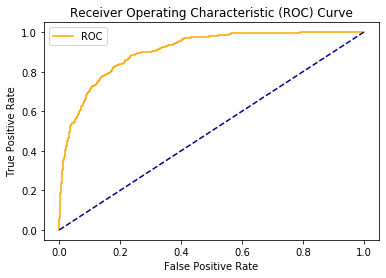

In [628]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
probs = xgb1.predict_proba(test_X)
auc = roc_auc_score(test_y, probs[:,1])
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(test_y, probs[:,1])
plot_roc_curve(fpr, tpr)

In [629]:
print(classification_report(test_y,xgb1.predict(test_X)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19380
           1       0.46      0.09      0.15       213

    accuracy                           0.99     19593
   macro avg       0.73      0.54      0.57     19593
weighted avg       0.98      0.99      0.99     19593



In [631]:
##########Tune max_depth and min_child_weight
param_test1 = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator =  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                        colsample_bytree=1, gamma=0,
                        learning_rate=0.1, max_delta_step=0,
                        max_depth=3, min_child_weight=1, 
                        missing=None, n_estimators=100,
                        n_jobs=1, nthread=None, 
                        objective='reg:linear', random_state=0,
                        reg_alpha=0, reg_lambda=1, 
                        scale_pos_weight=1, seed=None,
                        silent=True, subsample=1)
                , 
                param_grid = param_test1, 
                scoring='roc_auc',
                n_jobs=4,
                iid=False, 
                cv=5)

gsearch1.fit(train_X,train_y)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=True,
                                    subsample=1, verbosity=1),
             iid=False, n_jobs=4,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
         

In [632]:
gsearch1.best_params_ 

{'max_depth': 5, 'min_child_weight': 1}

In [633]:
gsearch1.refit_time_

6.106208086013794

In [634]:
my_model2 = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                        colsample_bytree=1, gamma=0,
                        learning_rate=0.1, max_delta_step=0,
                        max_depth=5, min_child_weight=1, 
                        missing=None, n_estimators=100,
                        n_jobs=1, nthread=None, 
                        objective='reg:linear', random_state=0,
                        reg_alpha=0, reg_lambda=1, 
                        scale_pos_weight=1, seed=None,
                        silent=True, subsample=1)

my_model2.fit(train_X, train_y, verbose=False)

"""
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
"""

# Performance sur le train
train_y_pred = my_model.predict(train_X)
auc = roc_auc_score(train_y, train_y_pred)
print("Performance train : ", auc)

# Performance sur le test
test_y_pred = my_model.predict(test_X)
auc = roc_auc_score(test_y, test_y_pred)
print("Performance test : ", auc)


Performance train :  0.9301670272528655
Performance test :  0.8880944248220662


In [637]:
##########Tune max_depth and min_child_weight
param_test2 = {
    'gamma':[i/10.0 for i in range(0,5)] 
}
gsearch2 = GridSearchCV(estimator =  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                        colsample_bytree=1, gamma=0,
                        learning_rate=0.1, max_delta_step=0,
                        max_depth=5, min_child_weight=1, 
                        missing=None, n_estimators=100,
                        n_jobs=1, nthread=None, 
                        objective='reg:linear', random_state=0,
                        reg_alpha=0, reg_lambda=1, 
                        scale_pos_weight=1, seed=None,
                        silent=True, subsample=1)
                , 
                param_grid = param_test2, 
                scoring='roc_auc',
                n_jobs=4,
                iid=False, 
                cv=5)

gsearch2.fit(train_X,train_y)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=5,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=True,
                                    subsample=1, verbosity=1),
             iid=False, n_jobs=4,
             param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4]},
             pre_dispatch='2*n_jobs', refit=True, return_train_s

In [638]:
gsearch2.best_params_ 

{'gamma': 0.0}

In [639]:
my_model2 = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                        colsample_bytree=1, gamma=0,
                        learning_rate=0.1, max_delta_step=0,
                        max_depth=5, min_child_weight=1, 
                        missing=None, n_estimators=100,
                        n_jobs=1, nthread=None, 
                        objective='reg:linear', random_state=0,
                        reg_alpha=0, reg_lambda=1, 
                        scale_pos_weight=1, seed=None,
                        silent=True, subsample=1)

my_model2.fit(train_X, train_y, verbose=False)

"""
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
"""

# Performance sur le train
train_y_pred = my_model.predict(train_X)
auc = roc_auc_score(train_y, train_y_pred)
print("Performance train : ", auc)

# Performance sur le test
test_y_pred = my_model.predict(test_X)
auc = roc_auc_score(test_y, test_y_pred)
print("Performance test : ", auc)


Performance train :  0.9301670272528655
Performance test :  0.8880944248220662


In [640]:
##########Tune max_depth and min_child_weight
param_test4 = {
    'subsample':[i/10.0 for i in range(6,10)],
    'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator =  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                        colsample_bytree=1, gamma=0,
                        learning_rate=0.1, max_delta_step=0,
                        max_depth=5, min_child_weight=1, 
                        missing=None, n_estimators=100,
                        n_jobs=1, nthread=None, 
                        objective='reg:linear', random_state=0,
                        reg_alpha=0, reg_lambda=1, 
                        scale_pos_weight=1, seed=None,
                        silent=True, subsample=1)
                , 
                param_grid = param_test4, 
                scoring='roc_auc',
                n_jobs=4,
                iid=False, 
                cv=5)

gsearch4.fit(train_X,train_y)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=5,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=True,
                                    subsample=1, verbosity=1),
             iid=False, n_jobs=4,
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
                         'subsample': [0.6, 0.7, 0.8, 0.9]}

In [642]:
gsearch4.best_params_ 

{'colsample_bytree': 0.9, 'subsample': 0.9}

In [643]:
my_model2 = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                        colsample_bytree=0.9, gamma=0,
                        learning_rate=0.1, max_delta_step=0,
                        max_depth=5, min_child_weight=1, 
                        missing=None, n_estimators=100,
                        n_jobs=1, nthread=None, 
                        objective='reg:linear', random_state=0,
                        reg_alpha=0, reg_lambda=1, 
                        scale_pos_weight=1, seed=None,
                        silent=True, subsample=0.9)

my_model2.fit(train_X, train_y, verbose=False)

"""
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
"""

# Performance sur le train
train_y_pred = my_model.predict(train_X)
auc = roc_auc_score(train_y, train_y_pred)
print("Performance train : ", auc)

# Performance sur le test
test_y_pred = my_model.predict(test_X)
auc = roc_auc_score(test_y, test_y_pred)
print("Performance test : ", auc)


Performance train :  0.9301670272528655
Performance test :  0.8880944248220662


In [644]:
##########Tune max_depth and min_child_weight
param_test6 = {
 'learning_rate':[i/1000.0 for i in range(5,20,2)]
}
gsearch6 = GridSearchCV(estimator =  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                        colsample_bytree=0.9, gamma=0,
                        learning_rate=0.1, max_delta_step=0,
                        max_depth=5, min_child_weight=1, 
                        missing=None, n_estimators=100,
                        n_jobs=1, nthread=None, 
                        objective='reg:linear', random_state=0,
                        reg_alpha=0, reg_lambda=1, 
                        scale_pos_weight=1, seed=None,
                        silent=True, subsample=0.9)
                , 
                param_grid = param_test6, 
                scoring='roc_auc',
                n_jobs=4,
                iid=False, 
                cv=5)

gsearch6.fit(train_X,train_y)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=0.9, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=5,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=True,
                                    subsample=0.9, verbosity=1),
             iid=False, n_jobs=4,
             param_grid={'learning_rate': [0.005, 0.007, 0.009, 0.011, 0.013,
                                           0

In [645]:
gsearch6.best_params_ 

{'learning_rate': 0.019}

In [646]:
my_model2 = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                        colsample_bytree=0.9, gamma=0,
                        learning_rate=0.019, max_delta_step=0,
                        max_depth=5, min_child_weight=1, 
                        missing=None, n_estimators=100,
                        n_jobs=1, nthread=None, 
                        objective='reg:linear', random_state=0,
                        reg_alpha=0, reg_lambda=1, 
                        scale_pos_weight=1, seed=None,
                        silent=True, subsample=0.9)

my_model2.fit(train_X, train_y, verbose=False)

"""
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
"""

# Performance sur le train
train_y_pred = my_model.predict(train_X)
auc = roc_auc_score(train_y, train_y_pred)
print("Performance train : ", auc)

# Performance sur le test
test_y_pred = my_model.predict(test_X)
auc = roc_auc_score(test_y, test_y_pred)
print("Performance test : ", auc)


Performance train :  0.9301670272528655
Performance test :  0.8880944248220662


In [ ]:
########### Fix learning rate and number of estimators for tuning tree-based parameters
# max deplt 5 -> 56% / 54% accuracy
#max depth 7 -> 62% / 54%  accrucacy
xgb2 = XGBClassifier(
    learning_rate =0.019, n_estimators=1000,
    max_depth=3, min_child_weight=1, gamma=0.4,subsample=0.9,colsample_bytree=0.6,
    objective= 'binary:logistic', nthread=4,scale_pos_weight=1,seed=27)
# modelfit(xgb1, train, train_X)
xgb2.fit(train_X, train_y)

# Performance sur le train
auc = roc_auc_score(train_y, xgb2.predict(train_X))
print("Performance sur le train : ", auc)

# Performance sur le test
auc = roc_auc_score(test_y, xgb2.predict(test_X))
print("Performance sur le test : ", auc)


In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
probs = xgb2.predict_proba(test_X)
auc = roc_auc_score(test_y, probs[:,1])
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(test_y, probs[:,1])
plot_roc_curve(fpr, tpr)

### doing for the test data now

In [727]:
test = pd.merge(test,campaign_data[['campaign_id','campaign_type','campaign_length']],on='campaign_id',how ='inner')

In [728]:
# taking campaign data into account 
print(test.shape)
train = pd.merge(train,campaign_data[['campaign_id','campaign_length','campaign_type']],on = 'campaign_id',how = 'inner')
print(test.shape)

(50226, 6)
(50226, 6)


In [729]:
# taking coupon data into account
test = pd.merge(test,pd.DataFrame(coupon_item_mapping['coupon_id'].value_counts()).reset_index().rename(columns = {'index':'coupon_id','coupon_id':'no_of_items_in_coupon'}),on = 'coupon_id',how='inner')
print(test.shape)

(50226, 7)


In [730]:
print(test.shape)

(50226, 7)


In [731]:
# taking customer's transaction data into account now
customer_transaction_data.head()
customer_transaction_data['recency'] =  pd.to_datetime('2013-09-03') - pd.to_datetime(customer_transaction_data['date'])
customer_transaction_data.recency = customer_transaction_data.recency.dt.days

In [732]:
test = pd.merge(test,customer_transaction_data[['customer_id','recency']].groupby('customer_id').min().reset_index(),on='customer_id',how = 'left')

In [733]:
test = pd.merge(test,customer_transaction_data[['customer_id','coupon_discount']].groupby('customer_id').mean().reset_index(),how='left',on='customer_id')
test.rename(columns = {'coupon_discount':'avg_coupon_discount'},inplace=True)

In [734]:
test.head()

,id,campaign_id,coupon_id,customer_id,campaign_type,campaign_length,no_of_items_in_coupon,recency,avg_coupon_discount
0,3,22,869,967,X,32,72,68,-1.550558
1,464,22,869,742,X,32,72,67,-0.318985
2,595,22,869,1103,X,32,72,63,-0.163571
3,939,22,869,963,X,32,72,64,-0.034740
4,1495,22,869,433,X,32,72,63,-1.646791


In [735]:
test = pd.merge(test,customer_transaction_data[['customer_id','quantity']].groupby('customer_id').sum().reset_index(),how='left',on='customer_id').rename(columns = {'quantity':'ttl_quantity'})


In [736]:
test.head()

,id,campaign_id,coupon_id,customer_id,campaign_type,campaign_length,no_of_items_in_coupon,recency,avg_coupon_discount,ttl_quantity
0,3,22,869,967,X,32,72,68,-1.550558,16644
1,464,22,869,742,X,32,72,67,-0.318985,58177
2,595,22,869,1103,X,32,72,63,-0.163571,1060691
3,939,22,869,963,X,32,72,64,-0.034740,39575
4,1495,22,869,433,X,32,72,63,-1.646791,1637


In [737]:
test['campaign_type_X'] = test['campaign_type'].map(lambda x :1 if x == 'X' else 0)
test.drop('campaign_type',axis=1,inplace=True)

In [738]:
test = pd.merge(test,customer_demographics,how='left',on='customer_id')


In [746]:
test.head()

,id,campaign_id,coupon_id,customer_id,campaign_length,no_of_items_in_coupon,recency,avg_coupon_discount,ttl_quantity,campaign_type_X,age_range,marital_status,rented,family_size,no_of_children,income_bracket,redemption_status
0,3,22,869,967,32,72,68,-1.550558,16644,1,2.0,3.0,0.0,1.0,0.0,5.0,0.089112
1,464,22,869,742,32,72,67,-0.318985,58177,1,3.0,3.0,0.0,2.0,0.0,2.0,0.014926
2,595,22,869,1103,32,72,63,-0.163571,1060691,1,1.0,1.0,0.0,2.0,0.0,4.0,0.032608
3,939,22,869,963,32,72,64,-0.034740,39575,1,NaN,NaN,NaN,NaN,NaN,NaN,0.002996
4,1495,22,869,433,32,72,63,-1.646791,1637,1,NaN,NaN,NaN,NaN,NaN,NaN,0.066538


In [740]:
test_x = test.drop({'customer_id','coupon_id','campaign_id'},axis=1)

In [741]:
test_x = my_imputer.transform(test_x)

In [748]:
test_x[4]

array([ 1.49500000e+03,  3.20000000e+01,  7.20000000e+01,  6.30000000e+01,
       -1.64679056e+00,  1.63700000e+03,  1.00000000e+00,  2.43522162e+00,
        1.99008572e+00,  5.72892834e-02,  2.22845551e+00,  5.81312346e-01,
        4.80805955e+00])

In [750]:
1.99008572e+00

1.99008572

In [743]:
ouput = my_model.predict(test_x)

In [744]:
test['redemption_status'] = ouput

In [745]:
test[['id','redemption_status']].sort_values('id').reset_index(drop=True).to_csv(r'C:\Users\ezchave\Desktop\Work\Amex\submission5.csv',index=False)

In [ ]:
test_x